In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'C:\Users\GD077686\OneDrive - Cerner Corporation\Desktop\datatrained\New folder\titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Survived: Outcome of survival (0 = No; 1 = Yes)
  # Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
 # Name: Name of passenger
  # Sex: Sex of the passenger
 # Age: Age of the passenger (Some entries contain NaN)
 # SibSp: Number of siblings and spouses of the passenger aboard
 # Parch: Number of parents and children of the passenger aboard
 # Ticket: Ticket number of the passenger
 # Fare: Fare paid by the passenger
 # Cabin Cabin number of the passenger (Some entries contain NaN)
 # Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

df.describe()

In [5]:
#checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


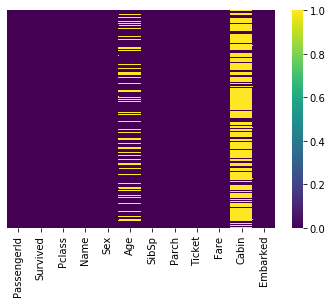

In [7]:
#checking the missing value through visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

0    549
1    342
Name: Survived, dtype: int64


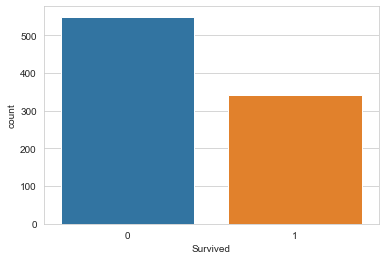

In [8]:
#checking the distribution of Survived columns(class)
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())

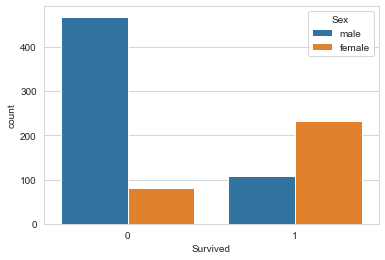

In [9]:
sns.countplot(x='Survived',data=df,hue='Sex')
# from the below graph we can observed that more no of male have died 
#survival-More female have survived because they wer give 1st priority to board the ship
# population of male was > than female.

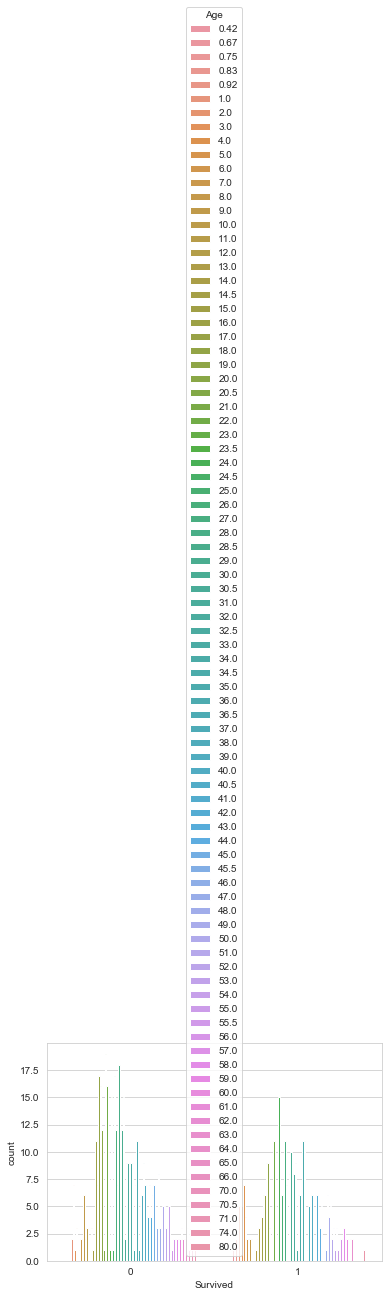

In [10]:
sns.countplot(x='Survived',data=df,hue='Age')

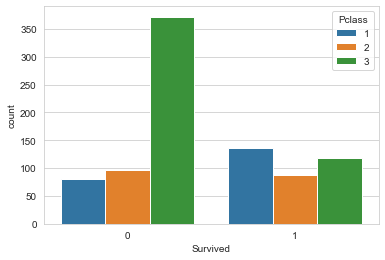

In [11]:
sns.countplot(x='Survived',data=df,hue='Pclass')
# from this plot we can observed that people from lower class(Pclass =3 )  could not survived 

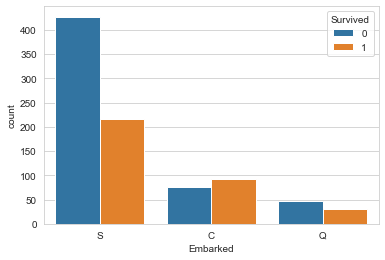

In [13]:
sns.countplot(x='Embarked',data=df,hue='Survived')

In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
#seperate the data into numeric and categorical
df_num=[['Age', 'SibSp','Parch','Fare', 'Sex']]
df_cat=[['Embarked','Survived', 'Pclass','Ticket','Cabin']]

In [39]:
pd.pivot_table(df,index='Survived',values=['Age', 'SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


1)people with Avg age of 28 survived 
.....2)  people who paid higher fare survived

In [41]:
# now we will do pivot tabel for categorical columns
#print(pd.pivot_table(df_cat,index="Survived",columns='Pclass',values='Ticket',aggfunc='count'))


In [20]:
df.groupby('Sex')[['Survived']].mean()  # doing groupby , we aboversed that 74 % of women Survived  and only 18 % male Survived

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
#female  had a higher survival rate from 1st class

In [34]:
age=pd.cut(df['Age'],[0,30,50,80])
df.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 30]   0.942857  0.931818  0.506329
       (30, 50]  0.972973  0.925926  0.272727
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 30]   0.500000  0.192308  0.167630
       (30, 50]  0.448980  0.114286  0.126761
       (50, 80]  0.192308  0.083333  0.000000

# female in  the age  group (0-30) and (30, 50] have higher survival rate in Pclass 1 and 2 
Male  in  the age  group (0-30) and (30, 50] have moderate survival rate in Pclass 1 and 2        
Male  in  the age  group (0-30) and [50, 80] have low  survival rate in Pclass 2 and 3       


In [42]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info() # checking the no of row and col in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking the unique values of columns

In [6]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df['Cabin'].unique()[]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [44]:
df['SibSp'].unique()
    

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [21]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [45]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [46]:
df['Name'].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

# Data Preprocessing 

In [40]:
#droping the PassengerId’ and Cabin(beacause it has 77 % of missing data) from the dataset
df=df.drop(['PassengerId','Cabin'],axis=1)




In [43]:
#remove the row with missing value
df=df.dropna(subset= ['Embarked','Age'])

In [ ]:
''''we have to deal with missig values in age and cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2

In [45]:
#Count the New no of row and column in dataset
df.shape

(712, 10)

In [48]:
# look at the datatype
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [47]:
#droping the Name ’ and Ticket       (beacause they dont have any significance) from the dataset
df=df.drop(['Name','Ticket'],axis=1)

In [51]:
#print the unique values in column for label encoding 
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1]


In [49]:
#Encoding the Embarked column with label encoding 

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
#encode the sex column
df.iloc[:,2]=label_encoder.fit_transform(df.iloc[:,2].values)
#encode the sex column
df.iloc[:,7]=label_encoder.fit_transform(df.iloc[:,7].values)

In [53]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


In [50]:
#print the unique values in column
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1]


In [52]:
#Split the data into independent and dependent 
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [54]:
#Normalize the data using Standard Scaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [56]:
#sliting the data set in 20 % testing and 80 % in training
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.20,random_state=0)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [66]:
#Create the function for differnt model
def models(X_train,y_train):
    
    #use Logistic regression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,y_train)
    
    #us KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    
    #Use SVC (linear)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,y_train)
    
    #use SVC(rbh)
    from sklearn.svm import SVC
    svc_rbh=SVC(kernel='rbf',random_state=0)
    svc_rbh.fit(X_train,y_train)
    
    #Use Decicsion tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,y_train)
    
    # USe GaussionNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,y_train)
    
    #use Random FOrest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,y_train)
    
    #print the training accuracy for each model
    print("[0]logistic  regression training model",log.score(X_train,y_train))
    print("[1]KNeighbors regression training model",knn.score(X_train,y_train))
    print("[2]SVC Linear regression training model",svc_lin.score(X_train,y_train))
    print("[3]SVC RBH regression training model",svc_rbh.score(X_train,y_train))
    print("[4]GaussionNP regression training model",tree.score(X_train,y_train))
    print("[5]Decision tree regression training model",gauss.score(X_train,y_train))
    print("[6]Random Forest regression training model",forest.score(X_train,y_train))
    
    
    return log,knn,svc_lin,svc_rbh,tree,forest,gauss

    

In [67]:
#Get and train all the model on training data
model=models(X_train,y_train)

[0]logistic  regression training model 0.7978910369068541
[1]KNeighbors regression training model 0.8629173989455184
[2]SVC Linear regression training model 0.7768014059753954
[3]SVC RBH regression training model 0.8506151142355008
[4]GaussionNP regression training model 0.9929701230228472
[5]Decision tree regression training model 0.8031634446397188
[6]Random Forest regression training model 0.9753954305799648


In [94]:
#saving the model
import pickle
with open( "modelfor prediction.sav",'wb') as f:
    pickle.dump(model,f)

In [68]:
# show the confusion matrix and accuracy of all the model in test data.
for i in range(len(model)):
    cr=classification_report(y_test,model[i].predict(X_test))
    print(cr)
    

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        82
           1       0.83      0.70      0.76        61

    accuracy                           0.81       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.81      0.81      0.81       143

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        82
           1       0.79      0.67      0.73        61

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        82
           1       0.78      0.70      0.74        61

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143

              preci


    [0]logistic regression 
    [1]KNeighbors 
    [2]SVC Linear 
    [3]SVC RBH 
    [4]GaussionNP 
    [5]Decision tree
    [6]Random Forest 

1)Logistic Regression is giving the higest accuracy on testing set of 81% ...
2)logistic regression and SVC RBH have the highest  F1 score of 84%

In [ ]:
# now let check the ROC_AUC score.

In [69]:
for i in range(len(model)):
    roc_score=roc_auc_score(y_test,model[i].predict(X_test))
    print(roc_score)

0.7975809676129549
0.7689924030387845
0.7792882846861255
0.7769892043182728
0.7838864454218313
0.7937824870051979
0.7322071171531388


1)Logistic Regression is giving the higest ROC_AUC _SCORE of 79.7 %


In [72]:
#Now let do the cross validation on logistic regression to check for overfitting
from sklearn.model_selection import cross_val_score
log=LogisticRegression(random_state=0)
scores=cross_val_score(log,X_train,y_train,cv=10,scoring='accuracy')
print("scores:",scores)
print("Mean :",scores.mean())
print("std",scores.std())

scores: [0.65517241 0.79310345 0.89473684 0.8245614  0.84210526 0.78947368
 0.8245614  0.75       0.83928571 0.80357143]
Mean : 0.8016571601417336
std 0.06092331544674841


From this we can infer that our logistic model is not overfitting 
... 1)Logistic model accuracy=81 %
...  2)cross_val_score of Logistic model=80 %

# Let try hyperparameter tuning for  logistic regression , if we can improve the accuracy

In [ ]:
LogisticRegression()LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='warn',
    max_iter=100,
    multi_class='warn',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,

In [76]:
grid_param={
    'penalty':['l1','l2'],
    'C' :  np.logspace(-4, 4, 20),
    'random_state' : range(0,100)
    
    
    
    
}
from sklearn.model_selection import GridSearchCV

In [77]:
grid=GridSearchCV(estimator=log,param_grid=grid_param)
grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
       

In [78]:
#finding the best parameter 
grid.best_params_

{'C': 0.615848211066026, 'penalty': 'l2', 'random_state': 0}

In [80]:
#fitting the model with best parameter
log=LogisticRegression(C= 0.615848211066026, penalty= 'l2', random_state=0)
log.fit(X_train,y_train)\


LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
#Printing the classification report 
y_pred=log.predict(X_test) 
print(f"classification report:\n{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        82
           1       0.83      0.70      0.76        61

    accuracy                           0.81       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.81      0.81      0.81       143



# Even after the hyperparameter tuning we are getting the same accuracy